In [21]:
import dtw
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp
import palantir
import scFates as scf
import unitvelo as utv

%matplotlib inline

sys.path.append("/home/sergey/tools/sclitr/")
import sclitr as sl

# Pathes
DATA_PATH = "/home/sergey/data/clonal_project"
HOME_PATH = "/home/sergey/projects/clonal_project"

# Additional functions
exec(open(f"{HOME_PATH}/tools/tools.py").read())

sys.path.append("/home/sergey/tools/mmbench/")
import mmbench as mb

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [22]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [23]:
scv.set_figure_params(dpi=150, dpi_save=300, vector_friendly=True)
sc.set_figure_params(dpi=150, dpi_save=300)
sns.set_style("ticks")

In [5]:
adata_2_full = sc.read_h5ad("../02_Fate_distribution/pathes_objects/path_2_full.h5ad")
adata_8_full = sc.read_h5ad("../02_Fate_distribution/pathes_objects/path_8_full.h5ad")

adata_2_full.obsm["X_umap"] = adata_2_full.obsm["X_umap"][:, [1, 0]]
adata_2_full.obsm["X_umap"][:, 0] = -adata_2_full.obsm["X_umap"][:, 0]

In [6]:
adata_counts = sc.read_h5ad(f"{DATA_PATH}/anndatas_counts/reference_E13.h5ad")

In [18]:
for layer in ["spliced", "unspliced", "ambiguous"]:
    adata_2_full.layers[layer] = adata_counts[adata_2_full.obs_names, adata_2_full.var_names].layers[layer].copy()
    adata_8_full.layers[layer] = adata_counts[adata_8_full.obs_names, adata_8_full.var_names].layers[layer].copy()
    
adata_2_full.X = adata_counts[adata_2_full.obs_names, adata_2_full.var_names].X.copy()
adata_8_full.X = adata_counts[adata_8_full.obs_names, adata_8_full.var_names].X.copy()

In [24]:
velo_config = utv.config.Configuration()

velo_config.VGENES = "offset"
velo_config.R2_ADJUST = False
velo_config.IROOT = "2"
velo_config.FIT_OPTION = "1"
velo_config.GPU = "1"

------> Manully Specified Parameters <------
R2_ADJUST:	False
VGENES:	offset
IROOT:	2
GPU:	1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
GENE_PRIOR:	None
--------------------------------------------

Current working dir is /home/sergey/projects/clonal_project/03_velocity.
Results will be stored in res folder


/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and

Extracted 2000 highly variable genes.
Computing moments for 2000 genes with n_neighbors: 30 and n_pcs: 30



/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/unitvelo/velocity.py:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  linear.loc[index[col], 'coef'] = float(reg.coef_)
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/unitvelo/velocity.py:199: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  linear.loc[index[col], 'inter'] = float(reg.intercept_)
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for 

# of velocity genes 1520 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 1348 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 1348 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.
Use diffusion pseudotime as initial.


Loss (Total): 1239.005, (Spliced): 592.400, (Unspliced): 646.605: 100%|█████████▉| 11999/12000 [30:06<00:00,  6.54it/s]  

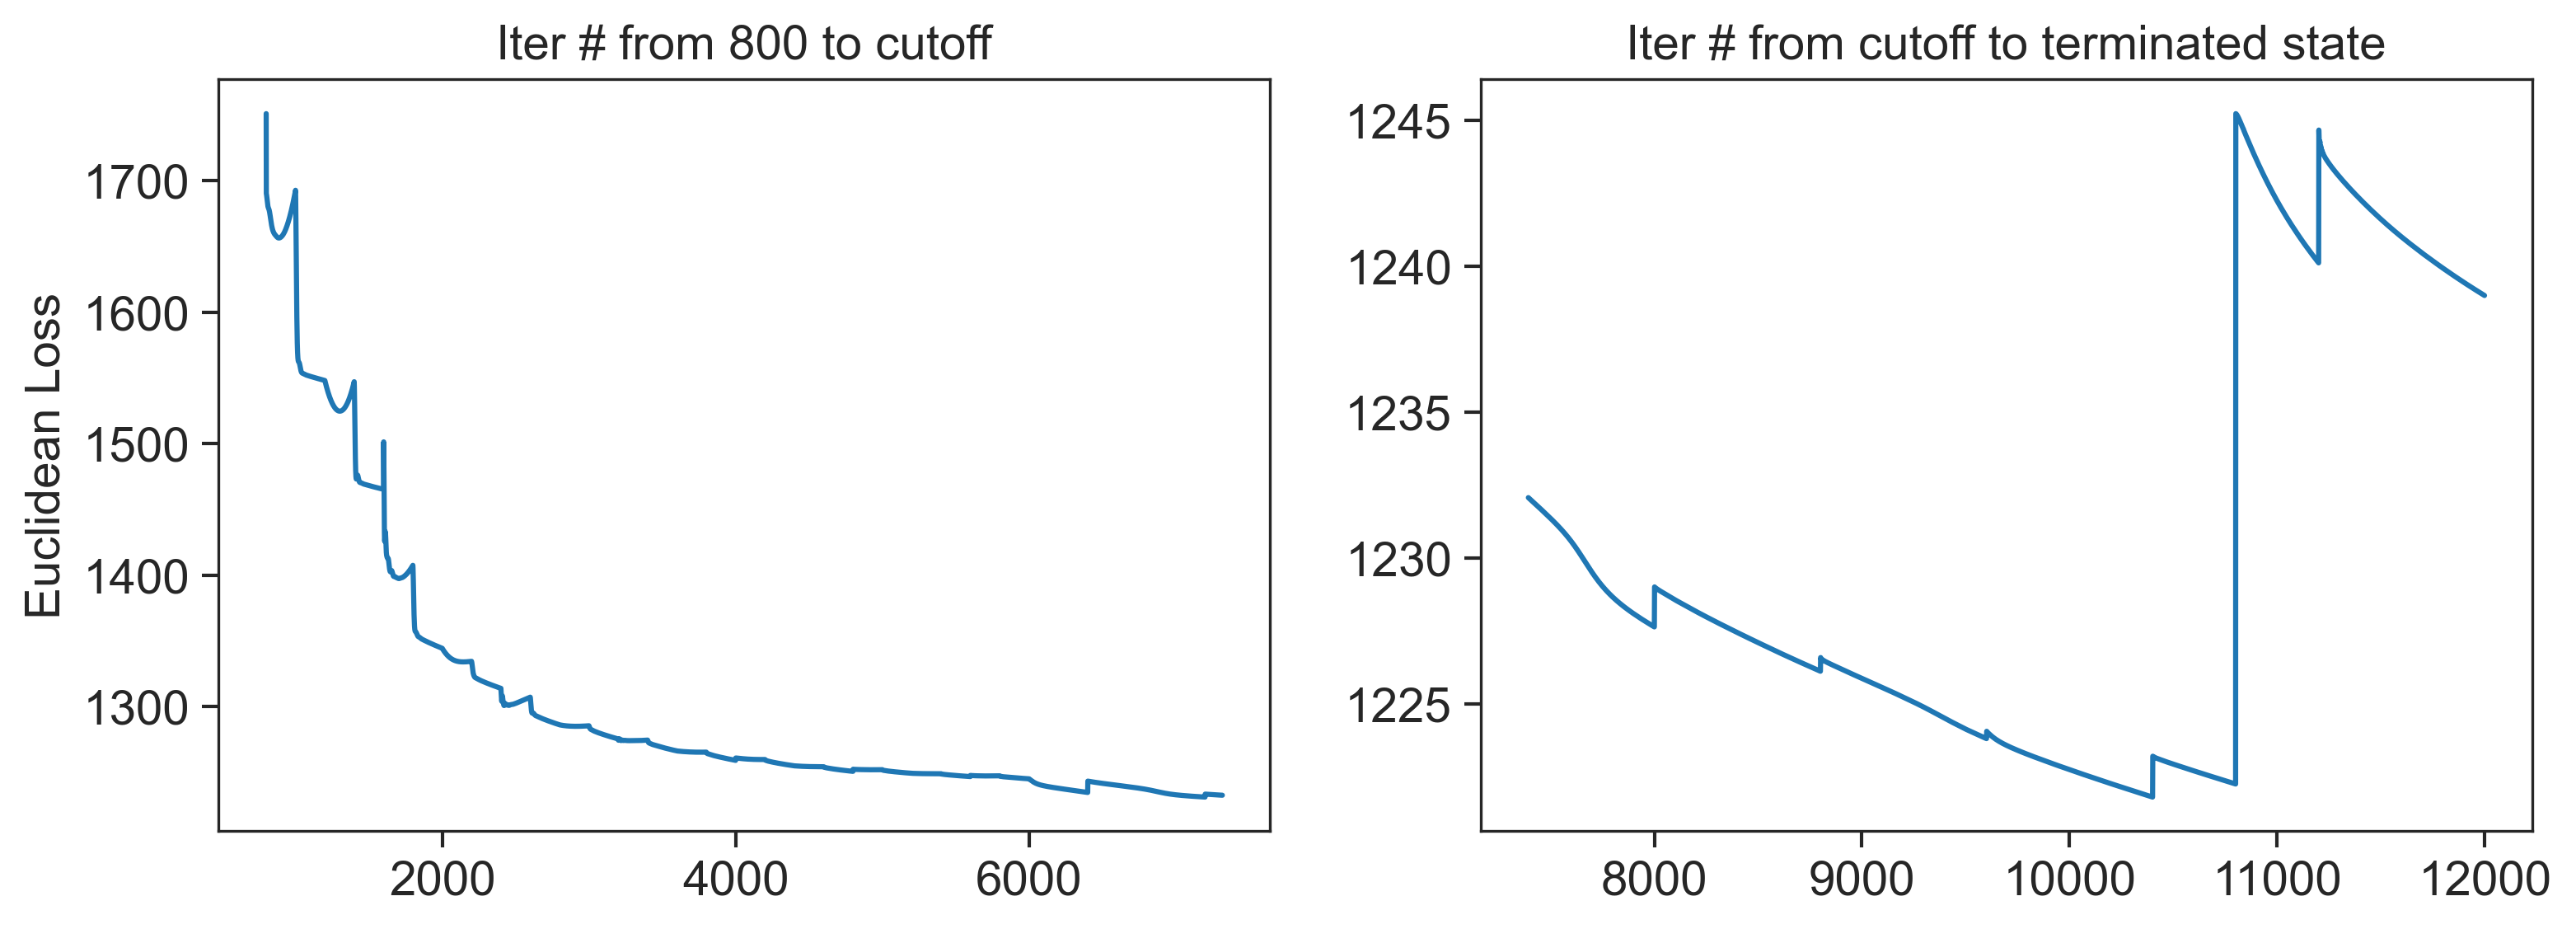

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 1239.005, (Spliced): 592.400, (Unspliced): 646.605: 100%|█████████▉| 11999/12000 [30:41<00:00,  6.52it/s]

Total loss 1221.821, vgene loss 1239.005


  0%|          | 0/1703 [00:00<?, ?cells/s]

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/h5py/_hl/attrs.py:103: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.create(name, data=value)
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/h5py/_hl/filters.py:250: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  chunks = guess_chunk(shape, maxshape, dtype.itemsize)


In [25]:
velocity_2 = adata_2_full.copy()
velocity_2_unitvelo = utv.run_model(velocity_2, "seg", config_file=velo_config)

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


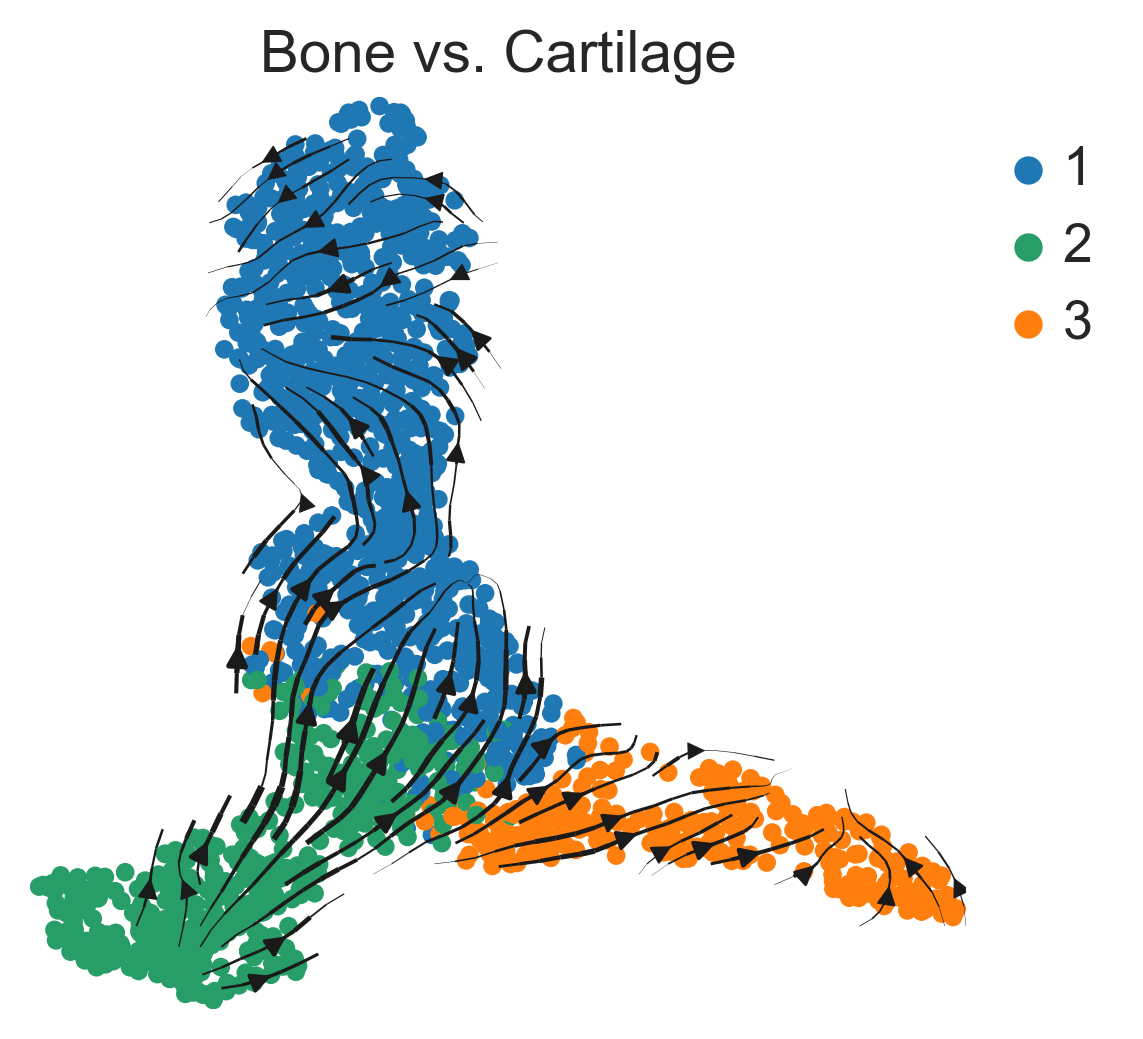

In [61]:
scv.pl.velocity_embedding_stream(velocity_2_unitvelo, s=80, alpha=1, dpi=150, title="Bone vs. Cartilage",
                                 color="seg", legend_loc=None, density=1.5, save="Path2.pdf")

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


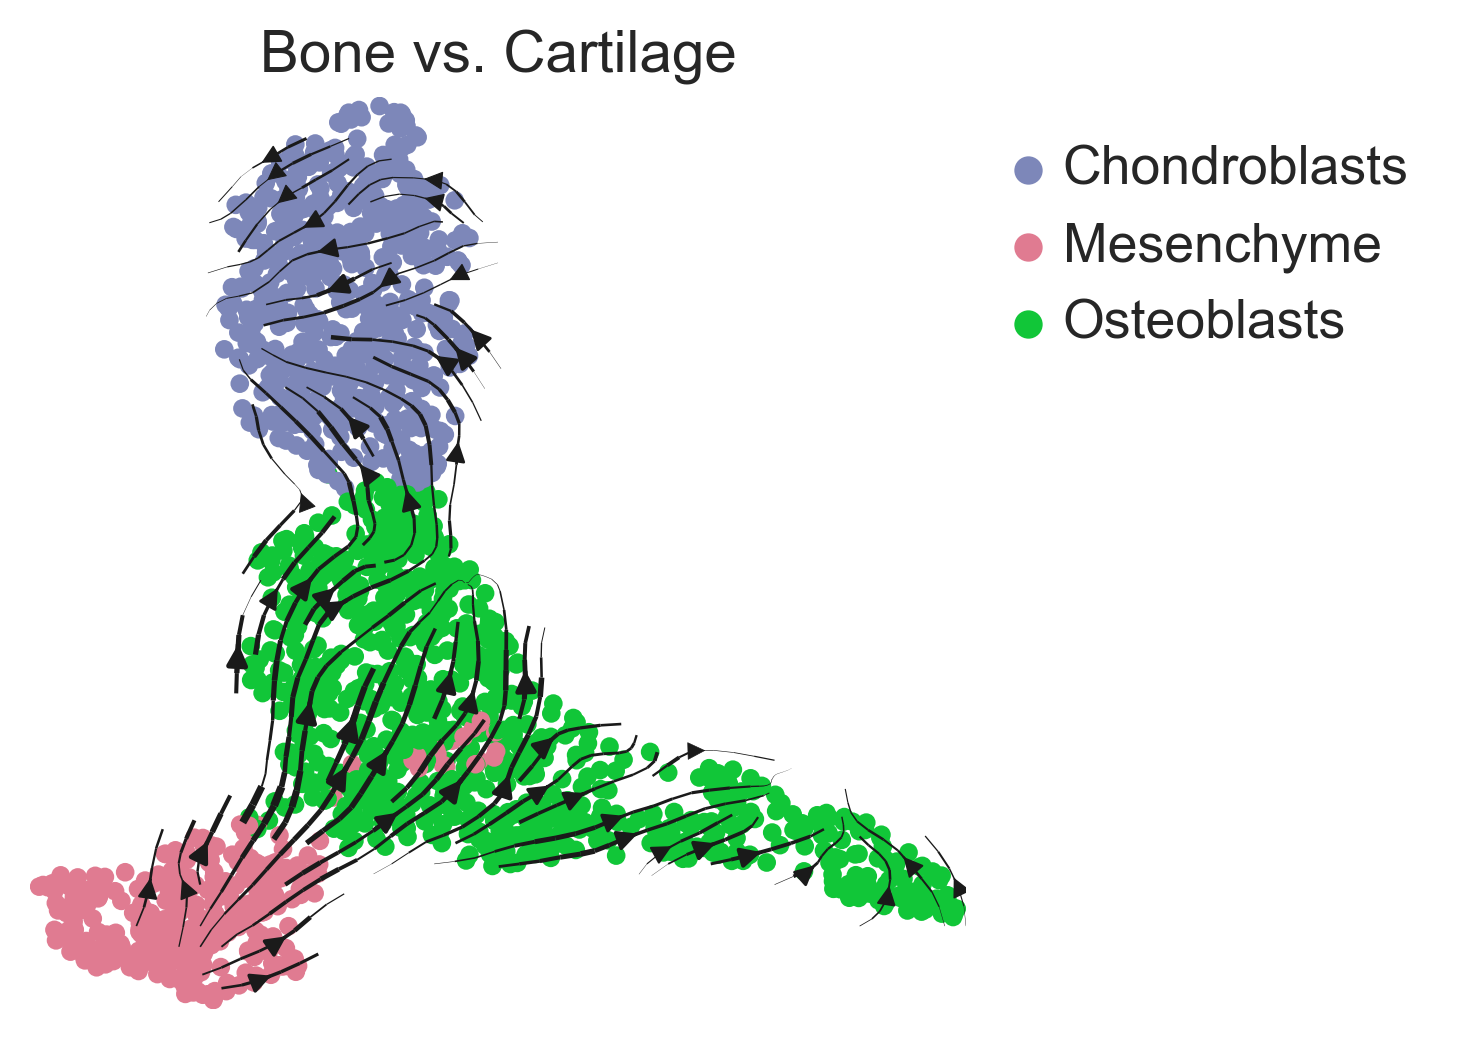

In [62]:
scv.pl.velocity_embedding_stream(velocity_2_unitvelo, s=80, alpha=1, dpi=150, title="Bone vs. Cartilage",
                                 color="celltype_l2", legend_loc=None, density=1.5, save="Path2_ct.pdf")

In [53]:
velo_config = utv.config.Configuration()

velo_config.VGENES = "offset"
velo_config.R2_ADJUST = False
velo_config.IROOT = "Middle mesenchyme"
velo_config.FIT_OPTION = "1"
velo_config.GPU = "1"

------> Manully Specified Parameters <------
R2_ADJUST:	False
VGENES:	offset
IROOT:	Middle mesenchyme
GPU:	1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
GENE_PRIOR:	None
--------------------------------------------

Current working dir is /home/sergey/projects/clonal_project/03_velocity.
Results will be stored in res folder


/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and

Extracted 2407 highly variable genes.
Computing moments for 2407 genes with n_neighbors: 30 and n_pcs: 30



/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/unitvelo/velocity.py:198: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  linear.loc[index[col], 'coef'] = float(reg.coef_)
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/unitvelo/velocity.py:199: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  linear.loc[index[col], 'inter'] = float(reg.intercept_)
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for 

# of velocity genes 1593 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 1384 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 1384 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.
Use diffusion pseudotime as initial.


Loss (Total): 312.603, (Spliced): 152.350, (Unspliced): 160.254: 100%|█████████▉| 11999/12000 [17:41<00:00, 10.85it/s] 

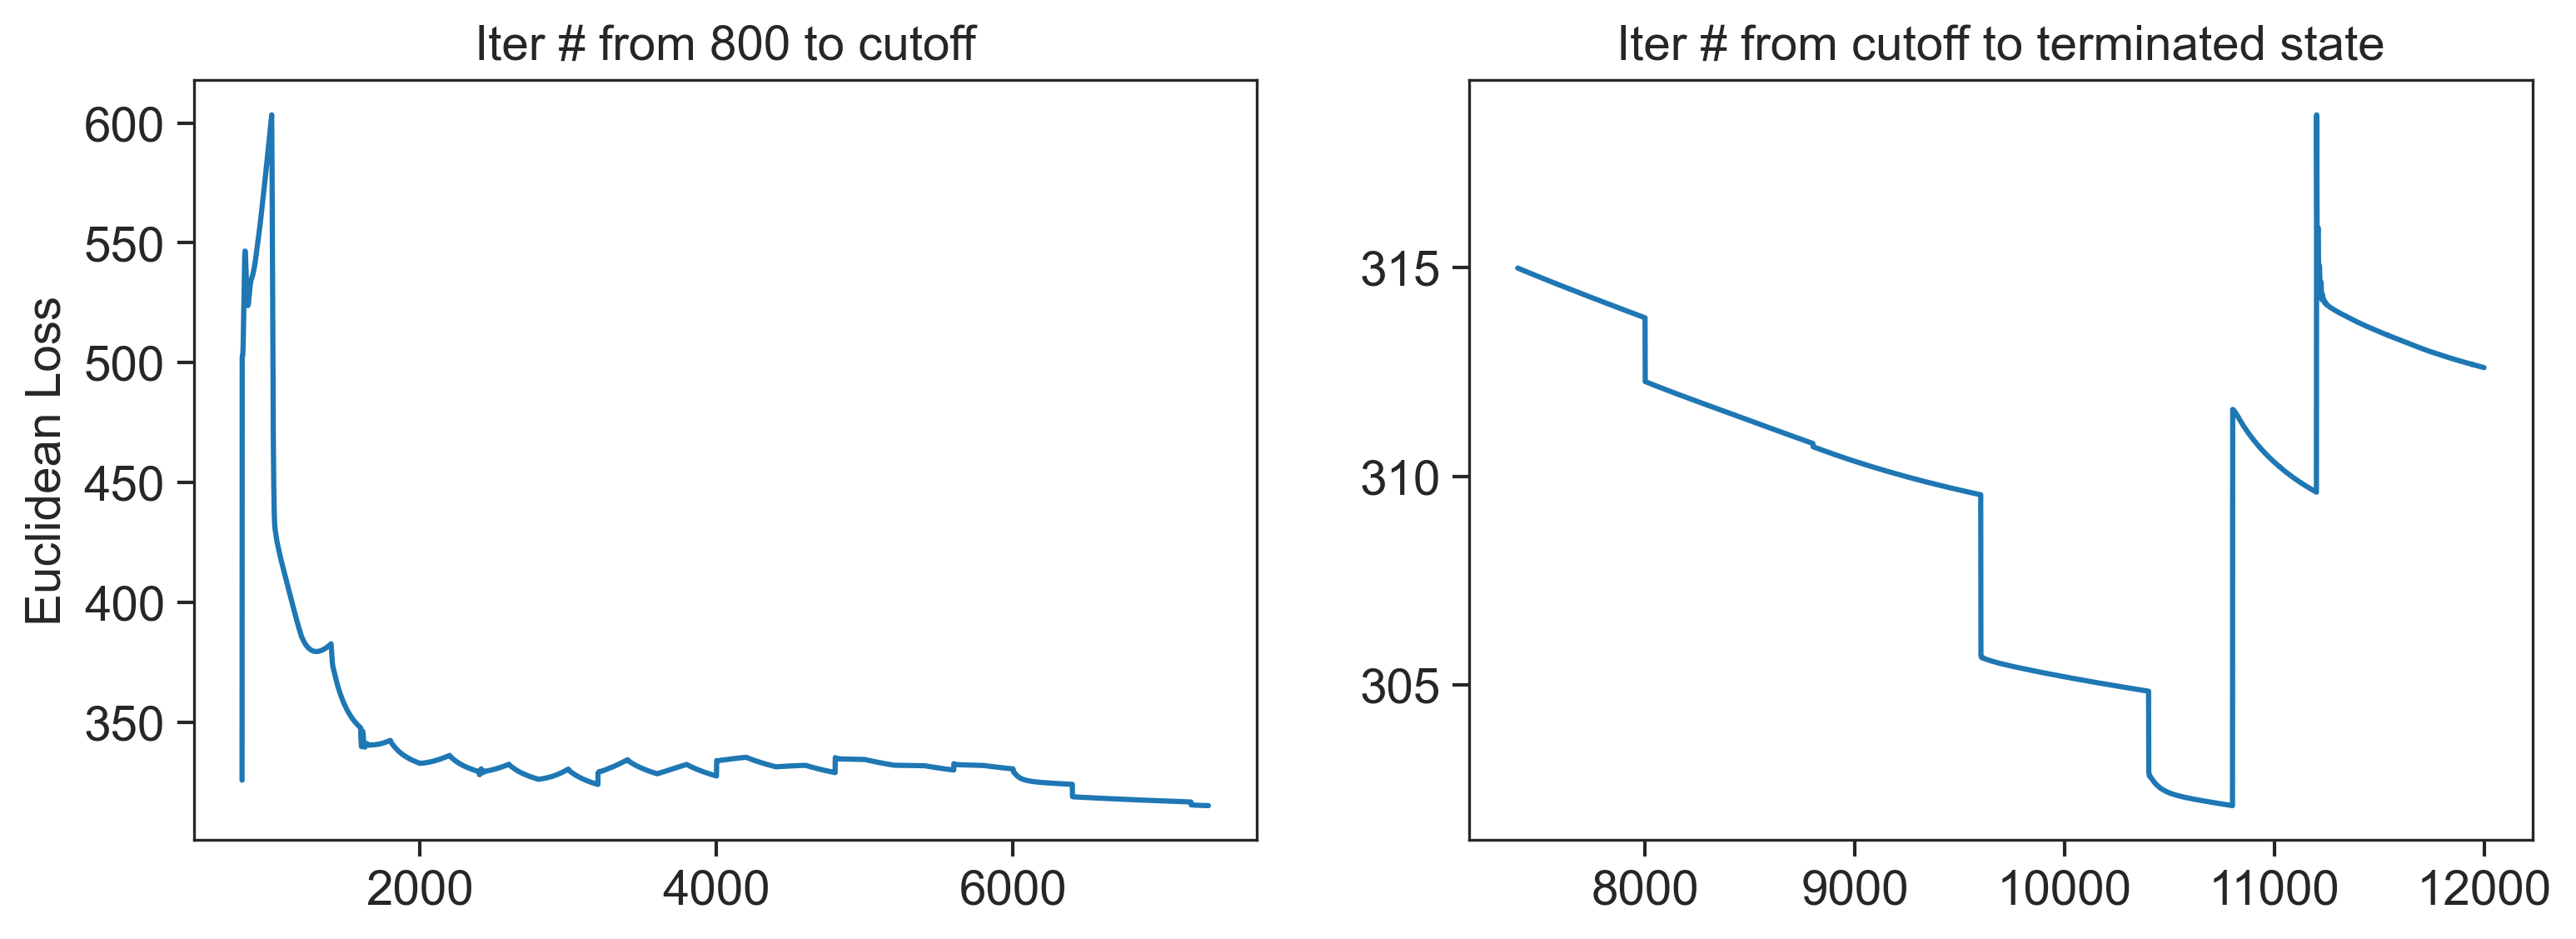

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Loss (Total): 312.603, (Spliced): 152.350, (Unspliced): 160.254: 100%|█████████▉| 11999/12000 [17:57<00:00, 11.14it/s]

Total loss 302.111, vgene loss 312.603


  0%|          | 0/617 [00:00<?, ?cells/s]

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/h5py/_hl/attrs.py:103: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.create(name, data=value)
/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/h5py/_hl/filters.py:250: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  chunks = guess_chunk(shape, maxshape, dtype.itemsize)


In [54]:
velocity_8 = adata_8_full.copy()
velocity_8_unitvelo = utv.run_model(velocity_8, "celltype_l2", config_file=velo_config)

/home/sergey/miniconda3/envs/sc/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


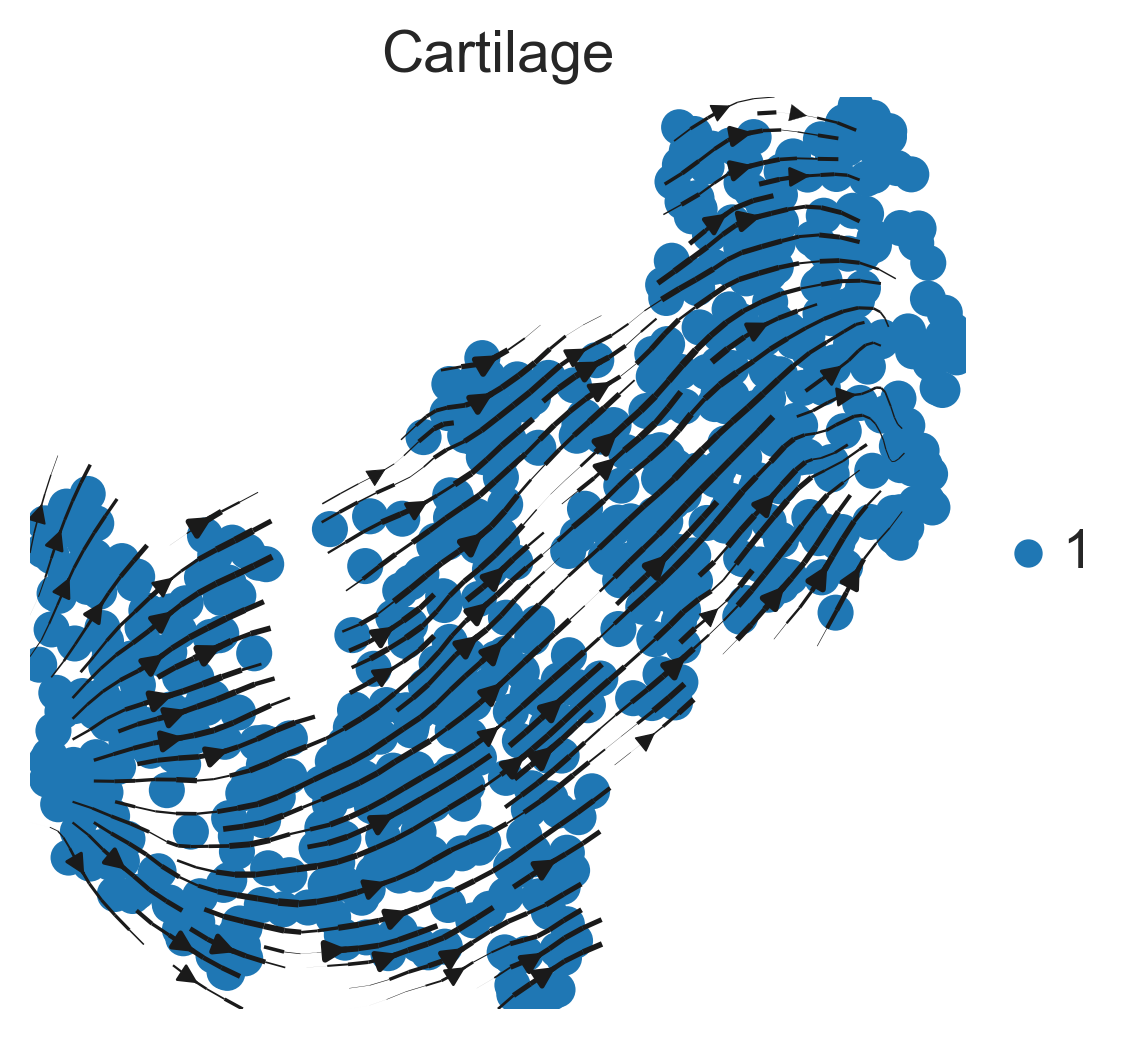

In [63]:
scv.pl.velocity_embedding_stream(velocity_8_unitvelo, s=300, alpha=1, dpi=150, title="Cartilage",
                                 color="seg", legend_loc="right", density=1.5, save="Path8.pdf")

(0.0, 15.0)

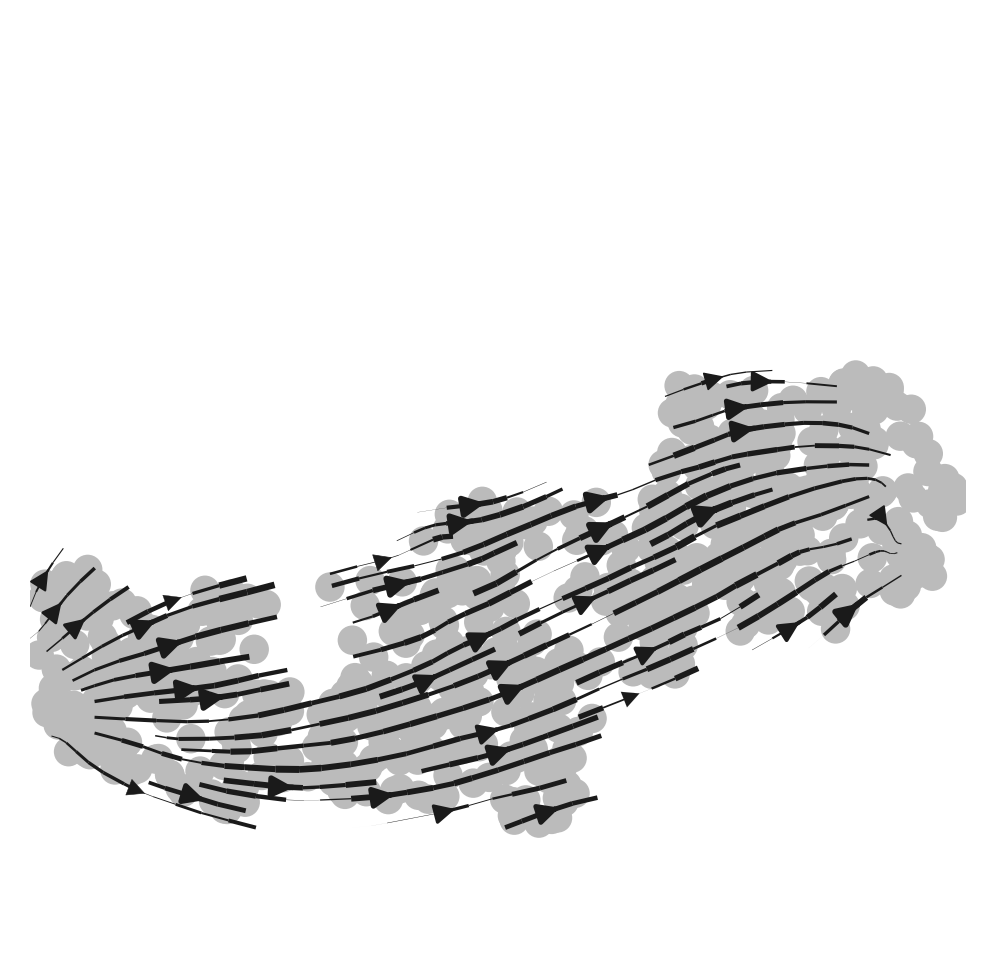

In [87]:
fig, ax = plt.subplots(figsize=(4, 4))
scv.pl.velocity_embedding_stream(velocity_8_unitvelo, s=200, alpha=1, dpi=150, title="", ax=ax,
                                 density=1, show=False, c="#BBBBBB")
ax.set_ylim(0, 15)

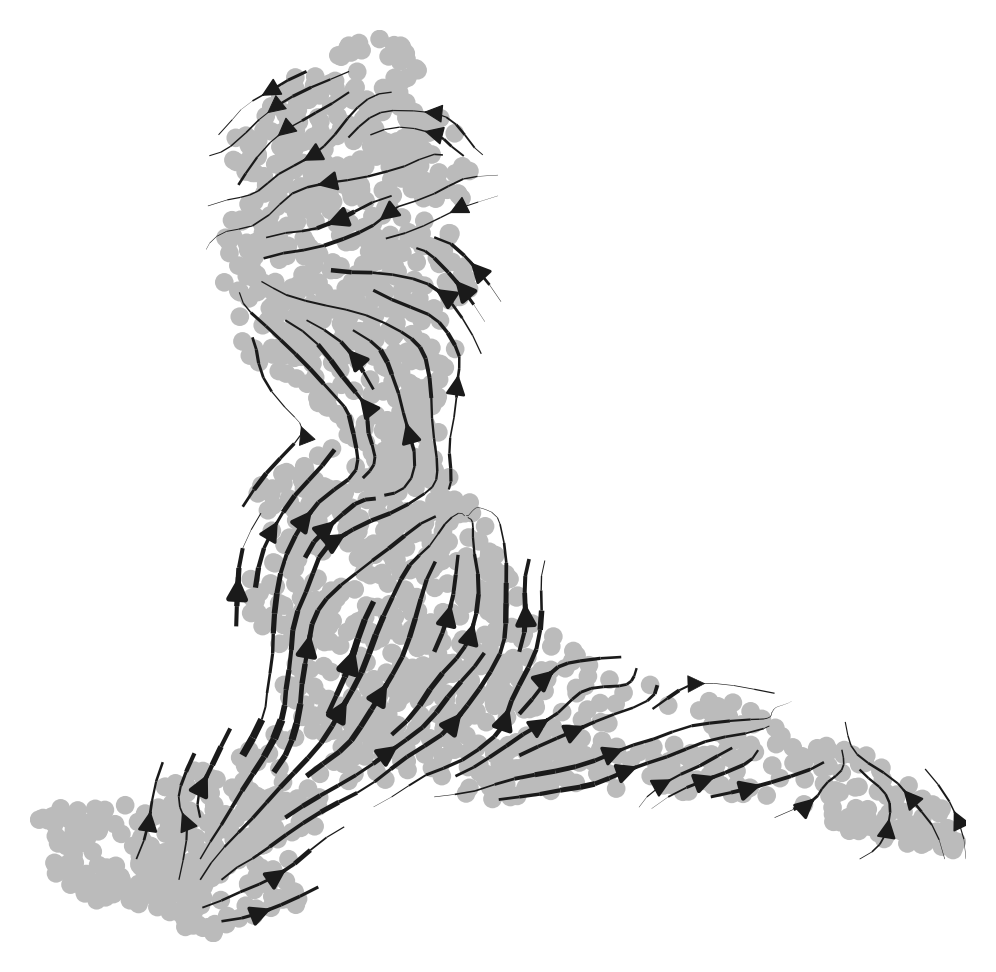

In [88]:
scv.pl.velocity_embedding_stream(velocity_2_unitvelo, s=80, alpha=1, dpi=150, title="",
                                 density=1.5, c="#BBBBBB")